# Import Required Libraries
Import the necessary libraries, including TensorFlow, Keras, and NumPy.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load and Preprocess the MNIST Dataset
Load the MNIST dataset from Keras, normalize the images, and convert the labels to categorical format.

In [2]:
# Load and Preprocess the MNIST Dataset

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the DNN Model
Define a sequential model with multiple dense layers, including input, hidden, and output layers.

In [3]:
# Build the DNN Model

# Define the sequential model
model = Sequential()

# Add a flatten layer to convert 2D images to 1D vectors
model.add(Flatten(input_shape=(28, 28)))

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add another dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add the output layer with 10 units and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

/Users/young/Documents/IoT-data-analysis-and-application/HW5/HW5_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model
Compile the model with an appropriate optimizer, loss function, and evaluation metric.

In [4]:
# Compile the Model

# Compile the model with an appropriate optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
Train the model using the training data and validate it using the validation data.

In [5]:
# Train the Model

# Train the model using the training data and validate it using the validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.4698 - val_accuracy: 0.9573 - val_loss: 0.1433
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9665 - loss: 0.1104 - val_accuracy: 0.9668 - val_loss: 0.1078
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9782 - loss: 0.0730 - val_accuracy: 0.9732 - val_loss: 0.0913
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9823 - loss: 0.0539 - val_accuracy: 0.9731 - val_loss: 0.0861
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9878 - loss: 0.0392 - val_accuracy: 0.9758 - val_loss: 0.0837
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9748 - val_loss: 0.0906
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0237 - val_accuracy: 0.9737 - val_loss: 0.0970
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9913 - loss: 0.0255 - 

# Evaluate the Model
Evaluate the model's performance on the test data and print the accuracy.

In [6]:
# Evaluate the Model

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9738 - loss: 0.1086
Test accuracy: 0.9768


# Make Predictions
Use the trained model to make predictions on new data and visualize the results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


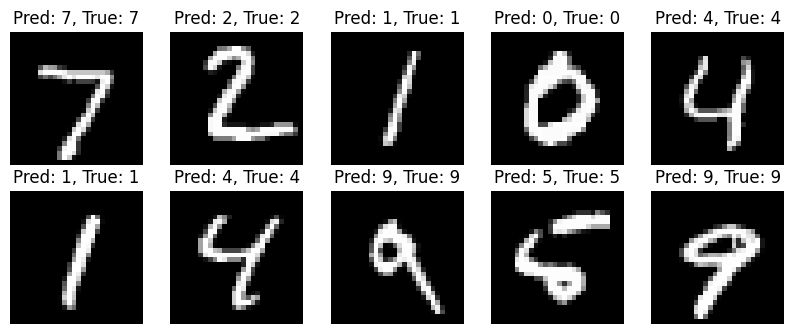

In [9]:
# Make Predictions

# Use the trained model to make predictions on the test data
predictions = model.predict(x_test)

# Convert predictions from one-hot encoded format to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Visualize the results
import matplotlib.pyplot as plt

# Plot the first 10 test images, their predicted labels, and the true labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
plt.show()